# Scenario with random traffic - Greatest improvement

In [1]:
import sys  
sys.path.insert(0, 'src/')

from commonroad.common.file_reader import CommonRoadFileReader
from simulate_interactive import simulate_interactive
from visualizer import Visualizer
import yaml
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

### Plot function used for the visualizations

In [2]:
def plot(time_step, ego_vehicle, scenarios, sensor_views):
    plt.cla()
    Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step)
    plt.axis('scaled')
    plt.xlim(0,120)
    plt.ylim(-40,40)

### Simulations (It will take some time)

Reading file: /home/aaa/foresee-the-unseen/scenarios_sumo/scenario_89_T/DEU_Ffb-1_7_I-1-1.cr.xml  Outputing to folder: /home/aaa/foresee-the-unseen/scenarios_sumo/scenario_89_T
 Retrying in 1 seconds
Loading configuration ... done.
***Starting server on port 33485 ***
Loading net-file from 'scenarios_sumo/scenario_89_T/DEU_Ffb-1_7_I-1-1.net.xml' ... done (4ms).
Loading additional-files from 'scenarios_sumo/scenario_89_T/DEU_Ffb-1_7_I-1-1.add.xml' ... done (1ms).
Loading done.
Simulation version 1.10.0 started with time: 0.00


Reached goal at time step:  118
Simulation ended at time: 12.20
Reason: TraCI requested termination.
Performance: 
 Duration: 3346.10s
 TraCI-Duration: 3346.07s
 Real time factor: 0.00364604
 UPS: 0.180509
Vehicles: 
 Inserted: 5
 Running: 5
 Waiting: 0
Emergency Stops: 3

Done simulating
Reading file: /home/aaa/foresee-the-unseen/scenarios_sumo/scenario_89_NT/DEU_Ffb-1_7_I-1-1.cr.xml  Outputing to folder: /home/aaa/foresee-the-unseen/scenarios_sumo/scenario_89_NT
 Retrying in 1 seconds
Loading configuration ... done.
***Starting server on port 58207 ***
Loading net-file from 'scenarios_sumo/scenario_89_NT/DEU_Ffb-1_7_I-1-1.net.xml' ... done (5ms).
Loading additional-files from 'scenarios_sumo/scenario_89_NT/DEU_Ffb-1_7_I-1-1.add.xml' ... done (0ms).
Loading done.
Simulation version 1.10.0 started with time: 0.00


Reached goal at time step:  247
Simulation ended at time: 25.10
Reason: TraCI requested termination.
Performance: 
 Duration: 4022.35s
 TraCI-Duration: 4022.32s
 Real time factor: 0.00624014
 UPS: 0.294356
Vehicles: 
 Inserted: 5
 Running: 4
 Waiting: 0
Emergency Stops: 3

Done simulating


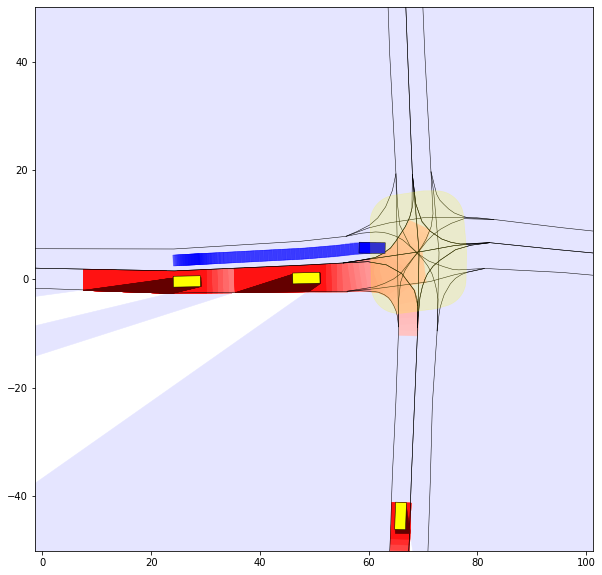

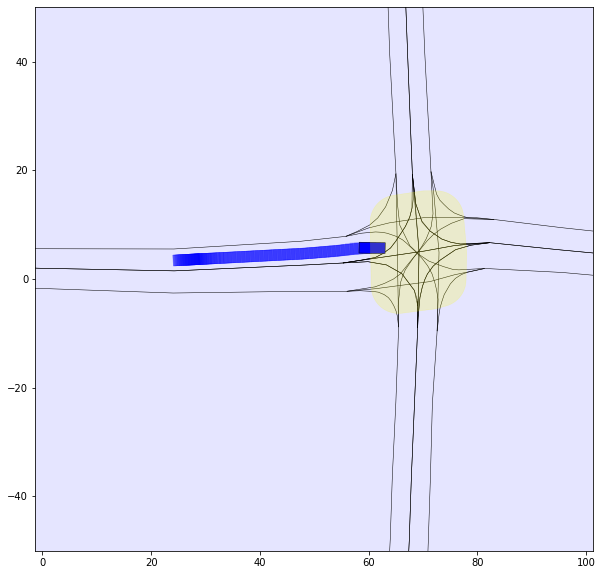

In [3]:
track_vehicle, tracked_scenarios, tracked_views = simulate_interactive('scenarios_sumo/scenario_89_T')
no_track_vehicle, not_tracked_scenarios, not_tracked_views = simulate_interactive('scenarios_sumo/scenario_89_NT')

### Plots (Same as Figure 8 in the paper)

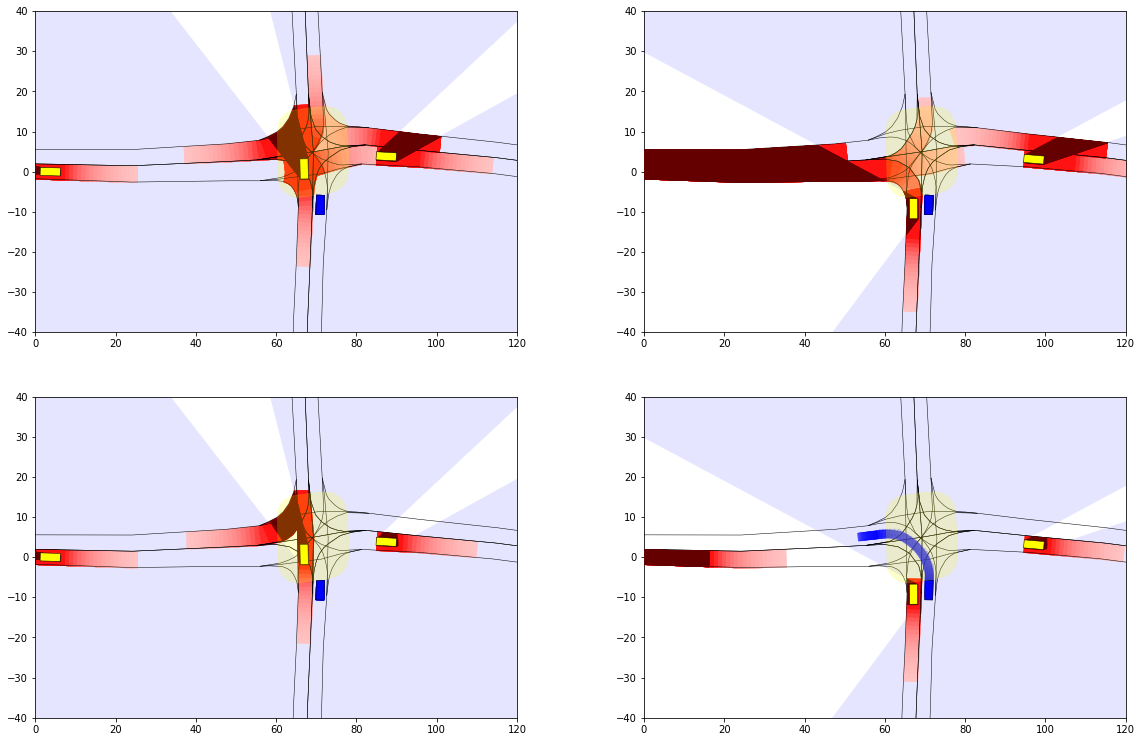

In [4]:
t1 = 73
t2 = 83
fig, ax = plt.subplots(2, 2, figsize=(20,13))
plt.sca(ax[0][0])
plot(t1, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[0][1])
plot(t2, no_track_vehicle, not_tracked_scenarios, not_tracked_views)
plt.sca(ax[1][0])
plot(t1, track_vehicle, tracked_scenarios, tracked_views)
plt.sca(ax[1][1])
plot(t2, track_vehicle, tracked_scenarios, tracked_views)

### Animation of the baseline method

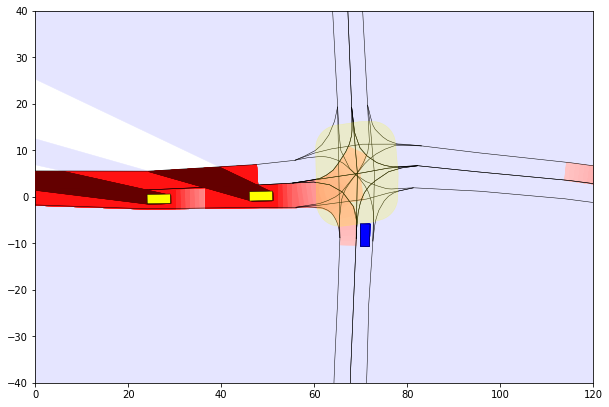

In [5]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[no_track_vehicle, not_tracked_scenarios, not_tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Animation of the proposed method

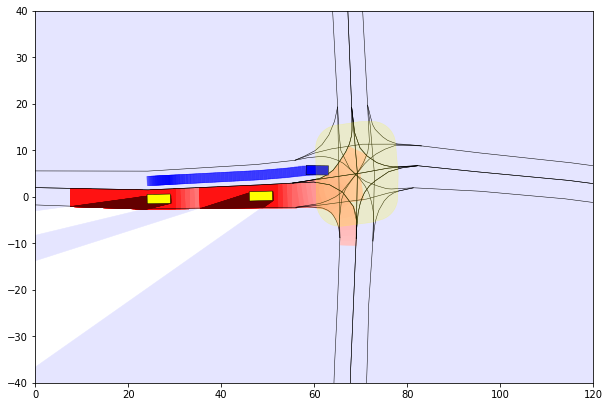

In [6]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[track_vehicle, tracked_scenarios, tracked_views], frames=len(tracked_scenarios), interval=100, blit=False)
HTML(anim.to_html5_video())

### Velocity comparison (Same as Figure 9)

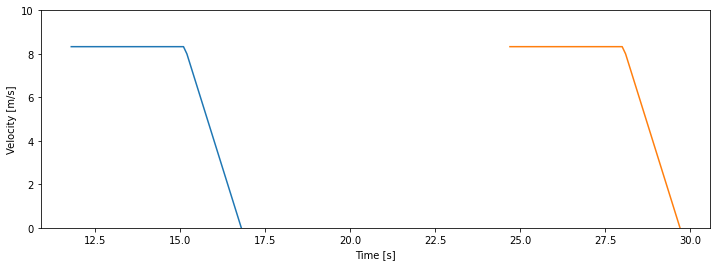

In [7]:
plt.figure(figsize=(12, 4))
labels = ['Proposed method','Baseline method']
for idx, vehicle in enumerate([track_vehicle, no_track_vehicle]):
    velocities = [round(vehicle.initial_state.velocity, 2)]
    time = [round(vehicle.initial_state.time_step/10, 2)]
    for state in vehicle.prediction.trajectory.state_list:
        velocities.append(round(state.velocity, 2))
        time.append(round(state.time_step/10, 2))
    plt.plot(time, velocities, label=labels[idx])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.ylim(0, 10);